In [4]:
import torch
import torch.nn as nn

from cnn_gamma_hadron import CNN, FCNN, Net
from cnn_gamma_hadron import load_data


In [5]:
# Load and preprocess the training data
train_input_tensor, train_input_tensor2, train_output_tensor, weights = load_data(
is_train=True
)

# Load and preprocess the test data
test_input_tensor, test_input_tensor2, test_output_tensor = load_data(is_train=False)


# Create an instance of the network
net = Net()

# Define your loss function
criterion = nn.BCELoss()

# Define your optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

Loading gamma data...
Skipping E = 7.0
Loading proton data...
Skipping E = 7.0
Loading gamma data...
Skipping E = 7.0
Loading proton data...
Skipping E = 7.0


In [14]:
output = net(train_input_tensor, train_input_tensor2)

In [12]:

# Calculate weighted loss
# print(torch.amax(output))
# print(torch.isfinite(output))
print(
    (output.shape),

)

print(torch.sum(torch.logical_not(torch.isfinite(output))))
# print(torch.amin(output))
# print(train_output_tensor)
print(torch.amax(output[list((torch.isfinite(output)))]))
print(torch.amin(output[list((torch.isfinite(output)))]))

torch.Size([209365])
tensor(1992)
tensor(1.0000, grad_fn=<AmaxBackward0>)
tensor(5.9155e-15, grad_fn=<AminBackward0>)


In [15]:
loss = criterion(
output[list((torch.isfinite(output)))],
train_output_tensor[list((torch.isfinite(output)))],
)

Plotting the results of the training and testing

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# Load the saved data
path = "/hkfs/work/workspace/scratch/rn8463-gamma_hadron/version0/" 
# path = "/hkfs/home/project/hk-project-pevradio/rn8463/gamma_hadron/"
# saved_data = torch.load("/hkfs/work/workspace/scratch/rn8463-gamma_hadron/test0/model/losses_accuracies.pth")
saved_data = torch.load(f"{path}/model/losses_accuracies.pth")

# Retrieve the arrays from the loaded data
train_losses = saved_data["train_losses"]
test_losses = saved_data["test_losses"]
val_losses = saved_data["val_losses"]
train_accuracies = saved_data["train_accuracies"]
test_accuracies = saved_data["test_accuracies"]
val_accuracies = saved_data["val_accuracies"]
num_epochs = len(train_losses)

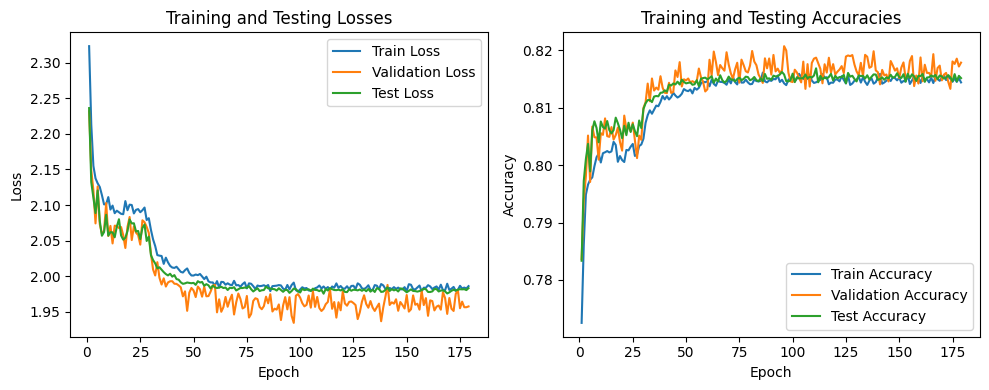

In [3]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Testing Losses")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracies")
plt.legend()

plt.tight_layout()
plt.show()
# plt.savefig(f"{args.outputDir}/plots/training_results.png")
# plt.close()